# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from datetime import datetime
from pandas.api.types import is_numeric_dtype
import os

# Reading the data

In [2]:
# TO FETCH THE LATEST DATASET AND UP-TO-DATE FIGURES, RUN THE BELOW COMMANDS
"""
#raw_data_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
#df = pd.read_csv(raw_data_url, error_bad_lines=False)
"""

# TO READ DOWNLOADED DATASET 
raw_df = pd.read_csv(r'owid-covid-data.csv')

In [3]:
raw_df

iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
92585      ZWE    Africa     Zimbabwe  2021-05-27      38854.0       35.0   
92586      ZWE    Africa     Zimbabwe  2021-05-28      38918.0       64.0   
92587      ZWE    Africa     Zimbabwe  2021-05-29      38933.0       15.0   
92588      ZWE    Africa     Zimbabwe  2021-05-30      38944.0       11.0   
92589      ZWE    Africa     Zimbabwe  2021-05-31      38961.0       17.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           NaN         NaN                  NaN  ...   
1                     NaN           NaN         NaN                  NaN  ...   
2                     NaN           NaN         NaN                  NaN  ...   
3                     NaN           NaN         NaN                  NaN  ...   
4                     NaN           NaN         NaN                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
92585              31.286        1592.0         3.0                1.000  ...   
92586              36.286        1592.0         0.0                0.857  ...   
92587              36.286        1594.0         2.0                1.143  ...   
92588              37.429        1594.0         0.0                1.143  ...   
92589              37.857        1594.0         0.0                1.143  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
92585        1899.775             21.4                307.846   
92586        1899.775             21.4                307.846   
92587        1899.775             21.4                307.846   
92588        1899.775             21.4                307.846   
92589        1899.775             21.4                307.846   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
92585                 1.82             1.6          30.7   
92586                 1.82             1.6          30.7   
92587                 1.82             1.6          30.7   
92588                 1.82             1.6          30.7   
92589                 1.82             1.6          30.7   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
92585                  36.791                         1.7   

# Analyzing information about the dataset

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92590 entries, 0 to 92589
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               92590 non-null  object 
 1   continent                              88200 non-null  object 
 2   location                               92590 non-null  object 
 3   date                                   92590 non-null  object 
 4   total_cases                            89750 non-null  float64
 5   new_cases                              89749 non-null  float64
 6   new_cases_smoothed                     88737 non-null  float64
 7   total_deaths                           79835 non-null  float64
 8   new_deaths                             79993 non-null  float64
 9   new_deaths_smoothed                    88737 non-null  float64
 10  total_cases_per_million                89270 non-null  float64
 11  ne

#### Description of numerical data values present in the dataset

In [5]:
raw_df.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  8.975000e+04  8.974900e+04        88737.000000  7.983500e+04   
mean   9.428784e+05  6.065578e+03         6078.273726  2.536382e+04   
std    6.507005e+06  3.861909e+04        37876.920441  1.512185e+05   
min    1.000000e+00 -3.486670e+05        -6223.000000  1.000000e+00   
25%    1.089000e+03  2.000000e+00            7.143000  4.900000e+01   
50%    1.200250e+04  7.100000e+01           88.714000  3.390000e+02   
75%    1.270760e+05  7.880000e+02          827.857000  3.310000e+03   
max    1.707274e+08  1.498213e+06       826374.286000  3.550000e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  79993.000000         88737.000000             89270.000000   
mean     142.207343           127.176786             11571.659247   
std      781.226472           721.581180             21783.995192   
min    -1918.000000          -232.143000                 0.001000   
25%        0.000000             0.000000               227.224250   
50%        2.000000             1.286000              1555.757500   
75%       18.000000            14.143000             11572.720500   
max    17906.000000         14436.286000            177661.296000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           89269.000000                    88262.000000   
mean               76.083727                       76.290975   
std               201.058617                      158.088957   
min             -5160.525000                     -276.825000   
25%                 0.207000                        1.231000   
50%                 7.968000                       10.551000   
75%                70.558000                       79.279250   
max             18293.675000                     4083.500000   

       total_deaths_per_million  ...  gdp_per_capita  extreme_poverty  \
count              79368.000000  ...    83315.000000     56353.000000   
mean                 252.106321  ...    19294.525068        13.382322   
std                  439.871653  ...    19963.713519        19.954802   
min                    0.001000  ...      661.240000         0.100000   
25%                    7.478000  ...     4466.507000         0.600000   
50%                   45.630500  ...    12951.839000         2.200000   
75%                  277.428250  ...    27216.445000        21.200000   
max                 3077.839000  ...   116935.600000        77.600000   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
count           83495.000000         85415.000000    65359.000000   
mean              258.143058             7.884258       10.540618   
std               118.894954             4.074100       10.429258   
min                79.370000             0.990000        0.100000   
25%               167.295000             5.310000        1.900000   
50%               242.648000             7.110000        6.300000   
75%               329.635000            10.080000       19.300000   
max               724.417000            30.530000       44.000000   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
count  64400.000000            41953.000000                76123.000000   
mean      32.673933               50.872085                    3.028665   
std       13.477401               31.761251                    2.460948   
min        7.700000                1.188000                    0.100000   
25%       21.600000               20.859000                    1.300000   
50%       31.400000               49.839000                    2.400000   
75%       41.100000               83.241000                    3.861000   
max       78.100000              100.000000                   13.800000   

       life_expectancy  human_development_index  
count     87920.000000             83673.000000  
mean         73.233802                 0.727702  
std           7.562331                 0.150397  
min          

#### Identifying the number of unique values present in each column (attribute)

In [6]:
raw_df.nunique()

iso_code                                   230
continent                                    6
location                                   230
date                                       517
total_cases                              49061
new_cases                                12285
new_cases_smoothed                       23605
total_deaths                             18699
new_deaths                                2883
new_deaths_smoothed                       6499
total_cases_per_million                  69617
new_cases_per_million                    39390
new_cases_smoothed_per_million           44471
total_deaths_per_million                 43364
new_deaths_per_million                    7399
new_deaths_smoothed_per_million           8786
reproduction_rate                          368
icu_patients                              2497
icu_patients_per_million                  5301
hosp_patients                             4885
hosp_patients_per_million                 8796
weekly_icu_ad

#### Identifying number of NULL values in each column

In [7]:
raw_df.isnull().sum()

iso_code                                     0
continent                                 4390
location                                     0
date                                         0
total_cases                               2840
new_cases                                 2841
new_cases_smoothed                        3853
total_deaths                             12755
new_deaths                               12597
new_deaths_smoothed                       3853
total_cases_per_million                   3320
new_cases_per_million                     3321
new_cases_smoothed_per_million            4328
total_deaths_per_million                 13222
new_deaths_per_million                   13064
new_deaths_smoothed_per_million           4328
reproduction_rate                        18119
icu_patients                             83261
icu_patients_per_million                 83261
hosp_patients                            80994
hosp_patients_per_million                80994
weekly_icu_ad

### Raw data parameters

In [8]:
raw_df_dimensions = raw_df.shape
raw_locations = raw_df.location.unique()
raw_df['date'] = pd.to_datetime(raw_df['date'])
raw_df_dates = raw_df['date'].to_list()
raw_df_latest_date = raw_df['date'].to_list()[-1].strftime('%b %d, %Y')

## Analyzing cases worldwide

In [9]:
dataset = raw_df[raw_df['date']==raw_df_latest_date]
dataset = dataset[~dataset['location'].isin(['World','International'])]
#dataset
dataset.head(10)

iso_code      continent             location       date  total_cases  \
462        AFG           Asia          Afghanistan 2021-05-31      71838.0   
936   OWID_AFR            NaN               Africa 2021-05-31    4840460.0   
1398       ALB         Europe              Albania 2021-05-31     132315.0   
1860       DZA         Africa              Algeria 2021-05-31     128913.0   
2316       AND         Europe              Andorra 2021-05-31      13727.0   
2754       AGO         Africa               Angola 2021-05-31      34551.0   
3313       ATG  North America  Antigua and Barbuda 2021-05-31       1260.0   
3830       ARG  South America            Argentina 2021-05-31    3781784.0   
4287       ARM           Asia              Armenia 2021-05-31     222670.0   
4351       ABW  North America                Aruba 2021-05-31          NaN   

      new_cases  new_cases_smoothed  total_deaths  new_deaths  \
462      1077.0             794.714        2944.0        25.0   
936     13569.0           10750.286      130636.0       332.0   
1398        6.0              14.286        2451.0         1.0   
1860      188.0             258.000        3472.0         7.0   
2316       34.0              22.571         127.0         0.0   
2754      185.0             275.429         766.0         2.0   
3313        1.0               0.286          42.0         0.0   
3830    28175.0           31378.429       78093.0       637.0   
4287       34.0              98.286        4438.0         6.0   
4351        NaN                 NaN           NaN         NaN   

      new_deaths_smoothed  ...  gdp_per_capita  extreme_poverty  \
462                18.857  ...        1803.987              NaN   
936               279.857  ...             NaN              NaN   
1398                0.857  ...       11803.431              1.1   
1860                6.571  ...       13913.839              0.5   
2316                0.000  ...             NaN              NaN   
2754                5.000  ...        5819.495              NaN   
3313                0.000  ...       21490.943              NaN   
3830              516.143  ...       18933.907              0.6   
4287                6.286  ...        8787.580              1.8   
4351                  NaN  ...       35973.781              NaN   

      cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
462                 597.029                 9.59             NaN   
936                     NaN                  NaN             NaN   
1398                304.195                10.08             7.1   
1860                278.364                 6.73             0.7   
2316                109.135                 7.97            29.0   
2754                276.045                 3.94             NaN   
3313                191.511                13.17             NaN   
3830                191.032                 5.50            16.2   
4287                341.010                 7.11             1.5   
4351                    NaN                11.62             NaN   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
462            NaN                  37.746                        0.50   
936            NaN                     NaN                         NaN   
1398          51.2                     NaN                        2.89   
1860          30.4                  83.741                        1.90   
2316          37.8                     NaN                         NaN   
2754           NaN                  26.664                         NaN   
3313           NaN                     NaN                        3.80   
3830          27.7                     NaN                        5.00   
4287          52.1                  94.043                        4.20   
4351           NaN                     NaN                         NaN   

      life_expectancy  human_development_index  
462             64.83                    0.511  
936               NaN          

## Top 10 countries in terms of total_deaths

In [10]:
top_10_deaths = dataset.sort_values("total_deaths", ascending = False)
top_10_deaths.head(10)

iso_code      continent        location       date  total_cases  \
28358  OWID_EUR            NaN          Europe 2021-05-31   46886797.0   
61609  OWID_NAM            NaN   North America 2021-05-31   38897492.0   
77451  OWID_SAM            NaN   South America 2021-05-31   28786883.0   
28853  OWID_EUN            NaN  European Union 2021-05-31   32198063.0   
4847   OWID_ASI            NaN            Asia 2021-05-31   51265865.0   
88252       USA  North America   United States 2021-05-31   33264399.0   
12255       BRA  South America          Brazil 2021-05-31   16545554.0   
38771       IND           Asia           India 2021-05-31   28175044.0   
54382       MEX  North America          Mexico 2021-05-31    2413742.0   
936    OWID_AFR            NaN          Africa 2021-05-31    4840460.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
28358    37228.0           52642.571     1074425.0      1109.0   
61609    19287.0           30196.857      878102.0       455.0   
77451   106848.0          138189.714      780195.0      2762.0   
28853    21263.0           34829.143      725642.0       627.0   
4847    201450.0          254832.000      685524.0      4018.0   
88252     5735.0           17248.143      594568.0       138.0   
12255    30434.0           60685.429      462791.0       860.0   
38771   127510.0          175167.143      331895.0      2795.0   
54382      932.0            2347.857      223568.0        61.0   
936      13569.0           10750.286      130636.0       332.0   

       new_deaths_smoothed  ...  gdp_per_capita  extreme_poverty  \
28358             1402.286  ...             NaN              NaN   
61609             1032.714  ...             NaN              NaN   
77451             3476.429  ...             NaN              NaN   
28853              791.857  ...             NaN              NaN   
4847              4802.714  ...             NaN              NaN   
88252              606.857  ...       54225.446              1.2   
12255             1847.571  ...       14103.452              3.4   
38771             3523.429  ...        6426.674             21.2   
54382              267.571  ...       17336.469              2.5   
936                279.857  ...             NaN              NaN   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
28358                    NaN                  NaN             NaN   
61609                    NaN                  NaN             NaN   
77451                    NaN                  NaN             NaN   
28853                    NaN                  NaN             NaN   
4847                     NaN                  NaN             NaN   
88252                151.089                10.79            19.1   
12255                177.961                 8.11            10.1   
38771                282.280                10.39             1.9   
54382                152.783                13.06             6.9   
936                      NaN                  NaN             NaN   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
28358           NaN                     NaN                         NaN   
61609           NaN                     NaN                         NaN   
77451           NaN                     NaN                         NaN   
28853           NaN                     NaN                         NaN   
4847            NaN                     NaN                         NaN   
88252          24.6                     NaN                        2.77   
12255          17.9                     NaN                        2.20   
38771          20.6                  59.550                        0.53   
54382          21.4                  87.847                        1.38   
936             NaN                     NaN                         NaN   

       life_expectancy  human_development_index  
28358              NaN                      NaN  
61609              NaN        

## Top 10 countries with least deaths

In [11]:
least_10_cases = dataset.sort_values("total_deaths",ascending = True)
least_10_cases.head(10)

iso_code      continent                          location       date  \
10465      BTN           Asia                            Bhutan 2021-05-31   
34069      GRD  North America                           Grenada 2021-05-31   
89343      VUT        Oceania                           Vanuatu 2021-05-31   
46345      LAO           Asia                              Laos 2021-05-31   
12712      BRN           Asia                            Brunei 2021-05-31   
29530      FJI        Oceania                              Fiji 2021-05-31   
14037      BDI         Africa                           Burundi 2021-05-31   
71055      VCT  North America  Saint Vincent and the Grenadines 2021-05-31   
26492      ERI         Africa                           Eritrea 2021-05-31   
83912      TLS           Asia                             Timor 2021-05-31   

       total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
10465       1620.0        8.0              29.857           1.0         0.0   
34069        161.0        0.0               0.000           1.0         0.0   
89343          4.0        0.0               0.000           1.0         0.0   
46345       1912.0        1.0              12.857           3.0         0.0   
12712        242.0        1.0               0.857           3.0         0.0   
29530        438.0       37.0              28.571           4.0         0.0   
14037       4790.0       36.0              34.857           6.0         0.0   
71055       2035.0        8.0               8.143          12.0         0.0   
26492       4094.0       33.0              23.143          14.0         0.0   
83912       6994.0       97.0             168.286          16.0         0.0   

       new_deaths_smoothed  ...  gdp_per_capita  extreme_poverty  \
10465                0.000  ...        8708.597              1.5   
34069                0.000  ...       13593.877              NaN   
89343                0.000  ...        2921.909             13.2   
46345                0.143  ...        6397.360             22.7   
12712                0.000  ...       71809.251              NaN   
29530                0.000  ...        8702.975              1.4   
14037                0.000  ...         702.225             71.7   
71055                0.000  ...       10727.146              NaN   
26492                0.000  ...        1510.459              NaN   
83912                0.429  ...        6570.102             30.3   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
10465                217.066                 9.75             NaN   
34069                243.964                10.71             NaN   
89343                546.300                12.02             2.8   
46345                368.111                 4.00             7.3   
12712                201.285                12.79             2.0   
29530                412.820                14.49            10.2   
14037                293.068                 6.05             NaN   
71055                252.675                11.62             NaN   
26492                311.110                 6.05             0.2   
83912                335.346                 6.86             6.3   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
10465           NaN                  79.807                         1.7   
34069           NaN                     NaN                         3.7   
89343          34.5                  25.209                         NaN   
46345          51.2                  49.839                         1.5   
12712          30.9                     NaN                         2.7   
29530          34.8                     NaN                         2.3   
14037           NaN                   6.144                         0.8   
71055           NaN                     NaN                         2.6   
26492          11.4                     NaN                         0.7   
83912          78.

## Collecting the Asia data from the raw dataset 

In [12]:
asia_data = raw_df[raw_df['continent'] =='Asia']
asia_data = asia_data[asia_data['date'] ==raw_df_latest_date]
asia_data = asia_data[~asia_data['location'].isin(['World','International'])]
asia_data.head()

iso_code continent     location       date  total_cases  new_cases  \
462       AFG      Asia  Afghanistan 2021-05-31      71838.0     1077.0   
4287      ARM      Asia      Armenia 2021-05-31     222670.0       34.0   
6258      AZE      Asia   Azerbaijan 2021-05-31     333956.0       92.0   
7163      BHR      Asia      Bahrain 2021-05-31     240531.0     2375.0   
7618      BGD      Asia   Bangladesh 2021-05-31     800540.0     1710.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
462              794.714        2944.0        25.0               18.857  ...   
4287              98.286        4438.0         6.0                6.286  ...   
6258             192.286        4913.0         6.0                6.571  ...   
7163            2812.000         980.0        27.0               18.857  ...   
7618            1431.286       12619.0        36.0               31.143  ...   

      gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
462         1803.987              NaN                597.029   
4287        8787.580              1.8                341.010   
6258       15847.419              NaN                559.812   
7163       43290.705              NaN                151.689   
7618        3523.984             14.8                298.003   

      diabetes_prevalence  female_smokers  male_smokers  \
462                  9.59             NaN           NaN   
4287                 7.11             1.5          52.1   
6258                 7.11             0.3          42.5   
7163                16.52             5.8          37.6   
7618                 8.38             1.0          44.7   

      handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
462                   37.746                         0.5            64.83   
4287                  94.043                         4.2            75.09   
6258                  83.241                         4.7            73.00   
7163                     NaN                         2.0            77.29   
7618                  34.808                         0.8            72.59   

      human_development_index  
462                     0.511  
4287                    0.776  
6258                    0.756  
7163                    0.852  
7618                    0.632  

[5 rows x 59 columns]

## Identifying Asian countries with most no. of deaths

In [13]:
top_10_asia_deaths  = asia_data.sort_values("total_deaths", ascending = False)
top_10_asia_deaths.head()

iso_code continent     location       date  total_cases  new_cases  \
38771      IND      Asia        India 2021-05-31   28175044.0   127510.0   
40175      IRN      Asia         Iran 2021-05-31    2913136.0    11042.0   
39227      IDN      Asia    Indonesia 2021-05-31    1821703.0     5662.0   
85747      TUR      Asia       Turkey 2021-05-31    5249404.0     6493.0   
66875      PHL      Asia  Philippines 2021-05-31    1230301.0     6674.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
38771          175167.143      331895.0      2795.0             3523.429  ...   
40175            9944.714       80156.0       217.0              186.857  ...   
39227            5796.571       50578.0       174.0              160.429  ...   
85747            7913.429       47527.0       122.0              154.429  ...   
66875            6513.571       20966.0       106.0              140.429  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
38771        6426.674             21.2                282.280   
40175       19082.620              0.2                270.308   
39227       11188.744              5.7                342.864   
85747       25129.341              0.2                171.285   
66875        7599.188              NaN                370.437   

       diabetes_prevalence  female_smokers  male_smokers  \
38771                10.39             1.9          20.6   
40175                 9.59             0.8          21.1   
39227                 6.32             2.8          76.1   
85747                12.13            14.1          41.1   
66875                 7.07             7.8          40.8   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
38771                  59.550                        0.53            69.66   
40175                     NaN                        1.50            76.68   
39227                  64.204                        1.04            71.72   
85747                     NaN                        2.81            77.69   
66875                  78.463                        1.00            71.23   

       human_development_index  
38771                    0.645  
40175                    0.783  
39227                    0.718  
85747                    0.820  
66875                    0.718  

[5 rows x 59 columns]

# Top 10 Asian countries with least number of  total_cases being reported

In [14]:
top_10_least_asia_cases = asia_data.sort_values("total_cases_per_million",ascending =True)
top_10_least_asia_cases.head()

iso_code continent location       date  total_cases  new_cases  \
17906      CHN      Asia    China 2021-05-31      91173.0       23.0   
90734      VNM      Asia  Vietnam 2021-05-31       7432.0      325.0   
91711      YEM      Asia    Yemen 2021-05-31       6742.0        5.0   
46345      LAO      Asia     Laos 2021-05-31       1912.0        1.0   
82123      TWN      Asia   Taiwan 2021-05-31       8511.0      351.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
17906              16.571        4636.0         0.0                0.000  ...   
90734             289.714          47.0         0.0                0.429  ...   
91711              11.429        1321.0         1.0                1.571  ...   
46345              12.857           3.0         0.0                0.143  ...   
82123             513.429         124.0        15.0               13.571  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
17906       15308.712              0.7                261.899   
90734        6171.884              2.0                245.465   
91711        1479.147             18.8                495.003   
46345        6397.360             22.7                368.111   
82123             NaN              NaN                103.957   

       diabetes_prevalence  female_smokers  male_smokers  \
17906                 9.74             1.9          48.4   
90734                 6.00             1.0          45.9   
91711                 5.35             7.6          29.2   
46345                 4.00             7.3          51.2   
82123                  NaN             NaN           NaN   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
17906                     NaN                        4.34            76.91   
90734                  85.847                        2.60            75.40   
91711                  49.542                        0.70            66.12   
46345                  49.839                        1.50            67.92   
82123                     NaN                         NaN            80.46   

       human_development_index  
17906                    0.761  
90734                    0.704  
91711                    0.470  
46345                    0.613  
82123                      NaN  

[5 rows x 59 columns]

# Pre-processing the raw dataset

In [15]:
min_population = 1000000
preProcessed_data_df = ''

preProcessed_df = raw_df.copy()

# CONVERT 'date' COLUMN TO DATETIME DATA TYPE
preProcessed_df['date'] = pd.to_datetime(preProcessed_df['date'])

# REMOVE SMALL LOCATIONS
preProcessed_df = preProcessed_df[preProcessed_df.population >= min_population]

# SET 'location' AS ROW INDEX
preProcessed_df.set_index('location', inplace=True)

#RE-SCALE 'total_vaccinations_per_hundred' AND 'people_fully_vaccinated_per_hundred' TO PER MILLION
preProcessed_df['total_vaccinations_per_hundred'] *= 10000
preProcessed_df['people_fully_vaccinated_per_hundred'] *= 10000
preProcessed_df.rename(columns = {"total_vaccinations_per_hundred":"total_vaccinations_per_million",
                                            "people_fully_vaccinated_per_hundred":"people_fully_vaccinated_per_million"}, inplace=True)

In [16]:
preProcessed_df

iso_code continent       date  total_cases  new_cases  \
location                                                            
Afghanistan      AFG      Asia 2020-02-24          1.0        1.0   
Afghanistan      AFG      Asia 2020-02-25          1.0        0.0   
Afghanistan      AFG      Asia 2020-02-26          1.0        0.0   
Afghanistan      AFG      Asia 2020-02-27          1.0        0.0   
Afghanistan      AFG      Asia 2020-02-28          1.0        0.0   
...              ...       ...        ...          ...        ...   
Zimbabwe         ZWE    Africa 2021-05-27      38854.0       35.0   
Zimbabwe         ZWE    Africa 2021-05-28      38918.0       64.0   
Zimbabwe         ZWE    Africa 2021-05-29      38933.0       15.0   
Zimbabwe         ZWE    Africa 2021-05-30      38944.0       11.0   
Zimbabwe         ZWE    Africa 2021-05-31      38961.0       17.0   

             new_cases_smoothed  total_deaths  new_deaths  \
location                                                    
Afghanistan                 NaN           NaN         NaN   
Afghanistan                 NaN           NaN         NaN   
Afghanistan                 NaN           NaN         NaN   
Afghanistan                 NaN           NaN         NaN   
Afghanistan                 NaN           NaN         NaN   
...                         ...           ...         ...   
Zimbabwe                 31.286        1592.0         3.0   
Zimbabwe                 36.286        1592.0         0.0   
Zimbabwe                 36.286        1594.0         2.0   
Zimbabwe                 37.429        1594.0         0.0   
Zimbabwe                 37.857        1594.0         0.0   

             new_deaths_smoothed  total_cases_per_million  ...  \
location                                                   ...   
Afghanistan                  NaN                    0.026  ...   
Afghanistan                  NaN                    0.026  ...   
Afghanistan                  NaN                    0.026  ...   
Afghanistan                  NaN                    0.026  ...   
Afghanistan                  NaN                    0.026  ...   
...                          ...                      ...  ...   
Zimbabwe                   1.000                 2614.155  ...   
Zimbabwe                   0.857                 2618.461  ...   
Zimbabwe                   1.143                 2619.471  ...   
Zimbabwe                   1.143                 2620.211  ...   
Zimbabwe                   1.143                 2621.354  ...   

             gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
location                                                              
Afghanistan        1803.987              NaN                597.029   
Afghanistan        1803.987              NaN                597.029   
Afghanistan        1803.987              NaN                597.029   
Afghanistan        1803.987              NaN                597.029   
Afghanistan        1803.987              NaN                597.029   
...                     ...              ...                    ...   
Zimbabwe           1899.775             21.4                307.846   
Zimbabwe           1899.775             21.4                307.846   
Zimbabwe           1899.775             21.4                307.846   
Zimbabwe           1899.775             21.4                307.846   
Zimbabwe           1899.775             21.4                307.846   

             diabetes_prevalence  female_smokers  male_smokers  \
location                                                         
Afghanistan                 9.59             NaN           NaN   
Afghanistan                 9.59             NaN           NaN   
Afghanistan                 9.59             NaN           NaN   
Afghanistan                 9.59             NaN           NaN   
Afghanistan                 9.59             NaN           NaN   
...                          ...             ...           ...   
Zimbabwe 

# Continents in terms of occurence of COVID-19 cases

In [17]:
preProcessed_df.continent.value_counts()

Africa           21723
Asia             20484
Europe           16828
North America     6433
South America     4650
Oceania           1389
Name: continent, dtype: int64

In [18]:
# ASKING USER WHETHER TO SAVE THE PLOT ON THE DISK OR NOT 

if (input("The latest date in the dataset is %s. Save/download plots? y/n: " 
          % raw_df_latest_date).lower()[0] == 'y'):
  save_files = True
  print("\nPlots will be saved/downloaded.")
else:
  save_files = False
  print("Plots will not be saved/downloaded.")

The latest date in the dataset is May 31, 2021. Save/download plots? y/n: n
Plots will not be saved/downloaded.


# Visualization

## Map visualization of total COVID-19 cases all over the world

In [19]:
map = px.choropleth(dataset, locations="iso_code", color="total_cases", hover_name='location', color_continuous_scale=["#28B463","#F7DC6F","#CB4335"],title="Total Cases of Covid19 in the World")

map.show()

## Total deaths across top 10 countries

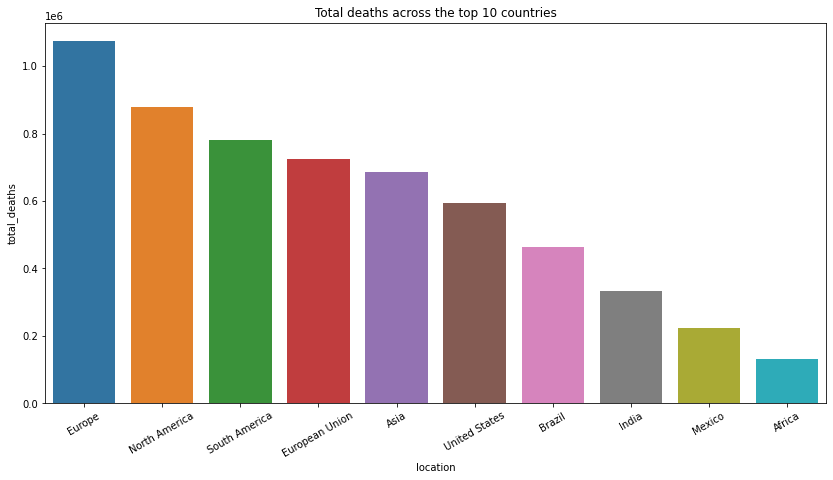

In [20]:
plt.figure(figsize=(14,7))
#sns.lineplot(x='location', y='total_deaths', data=top_10_deaths[0:10], color='red')
sns.barplot(x='location', y='total_deaths', data=top_10_deaths[0:10])
plt.xticks(x='location', rotation=30)
plt.yticks(y='total_deaths')
plt.title("Total deaths across the top 10 countries")

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/countries_with_top_10_deaths'
  plt.savefig(filename, bbox_inches = 'tight')

## Total deaths among 10 countries with least no. of deaths

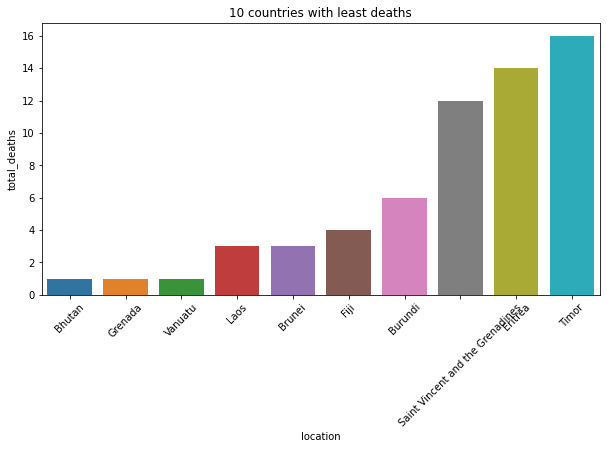

In [21]:
plt.figure(figsize=(10,5))
#sns.lineplot(x='location',y='total_deaths',data=top_10_deaths[0:10],color='red')
sns.barplot(x='location',y='total_deaths',data=least_10_cases[0:10])
plt.xticks(x='location', rotation=45)
plt.title("10 countries with least deaths")

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/countries_with_least_deaths'
  plt.savefig(filename, bbox_inches = 'tight')

## Top 5 Asian countries in terms of deaths

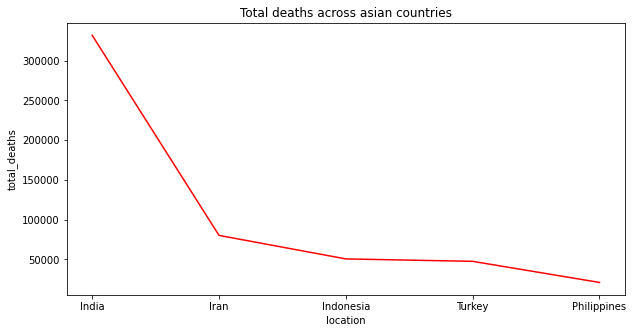

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location', y='total_deaths', data=top_10_asia_deaths[0:5], color='red')
plt.title("Total deaths across asian countries")

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/asian_countries_with_most_deaths'
  plt.savefig(filename, bbox_inches = 'tight')

## Least number of total_cases reported across Asian Countries 

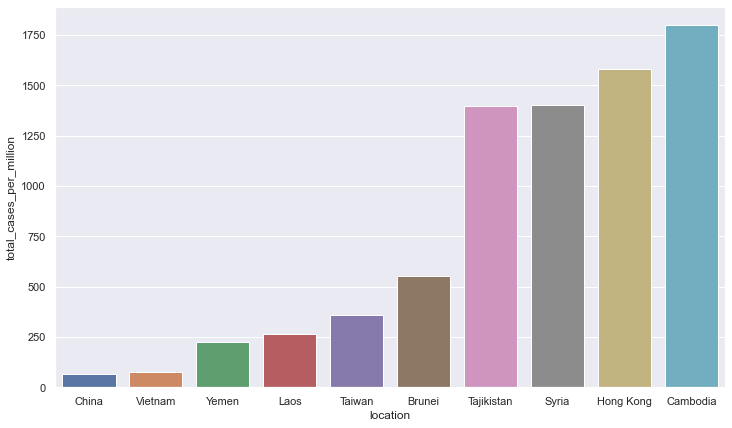

In [23]:
sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(x="location", y="total_cases_per_million", data=top_10_least_asia_cases.head(10))

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/asian_countries_with_least_cases'
  plt.savefig(filename, bbox_inches = 'tight')

# Positivity rate in Asia

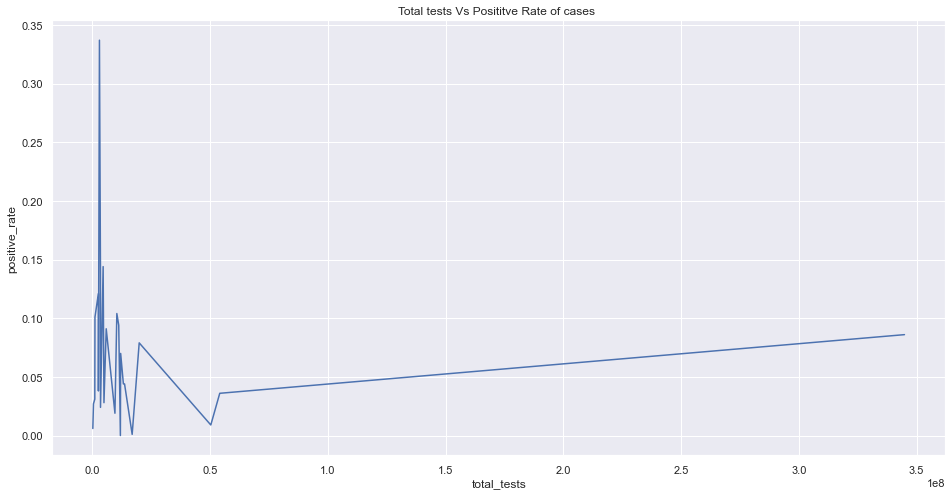

In [24]:
plt.figure(figsize=(16,8))
sns.lineplot(x='total_tests', y='positive_rate', data=asia_data)
plt.title("Total tests Vs Posititve Rate of cases ")

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/total_test_vs_positivity_rate_in_asia'
  plt.savefig(filename, bbox_inches = 'tight')

In [25]:
# CREATING DATASETS TO BE USED
perCapita_daily_columns = ["date","new_cases_smoothed_per_million", "new_deaths_smoothed_per_million",
                           "new_vaccinations_smoothed_per_million"]

perCapita_cumulative_columns = ["date", "total_cases_per_million", "total_deaths_per_million",
                                "total_vaccinations_per_million", "people_fully_vaccinated_per_million"]

# CREATING NEW DATAFRAMES
perCapita_daily_df = preProcessed_df[perCapita_daily_columns]
perCapita_cumulative_df = preProcessed_df[perCapita_cumulative_columns]

In [26]:
perCapita_cumulative_df

date  total_cases_per_million  total_deaths_per_million  \
location                                                                    
Afghanistan 2020-02-24                    0.026                       NaN   
Afghanistan 2020-02-25                    0.026                       NaN   
Afghanistan 2020-02-26                    0.026                       NaN   
Afghanistan 2020-02-27                    0.026                       NaN   
Afghanistan 2020-02-28                    0.026                       NaN   
...                ...                      ...                       ...   
Zimbabwe    2021-05-27                 2614.155                   107.112   
Zimbabwe    2021-05-28                 2618.461                   107.112   
Zimbabwe    2021-05-29                 2619.471                   107.247   
Zimbabwe    2021-05-30                 2620.211                   107.247   
Zimbabwe    2021-05-31                 2621.354                   107.247   

             total_vaccinations_per_million  \
location                                      
Afghanistan                             NaN   
Afghanistan                             NaN   
Afghanistan                             NaN   
Afghanistan                             NaN   
Afghanistan                             NaN   
...                                     ...   
Zimbabwe                            64100.0   
Zimbabwe                            65700.0   
Zimbabwe                            67400.0   
Zimbabwe                            68100.0   
Zimbabwe                            68600.0   

             people_fully_vaccinated_per_million  
location                                          
Afghanistan                                  NaN  
Afghanistan                                  NaN  
Afghanistan                                  NaN  
Afghanistan                                  NaN  
Afghanistan                                  NaN  
...                                          ...  
Zimbabwe                                 20500.0  
Zimbabwe                                 21500.0  
Zimbabwe                                 22600.0  
Zimbabwe                                 23000.0  
Zimbabwe                                 23200.0  

[75417 rows x 5 columns]

# PER CAPITA DAILY DATA

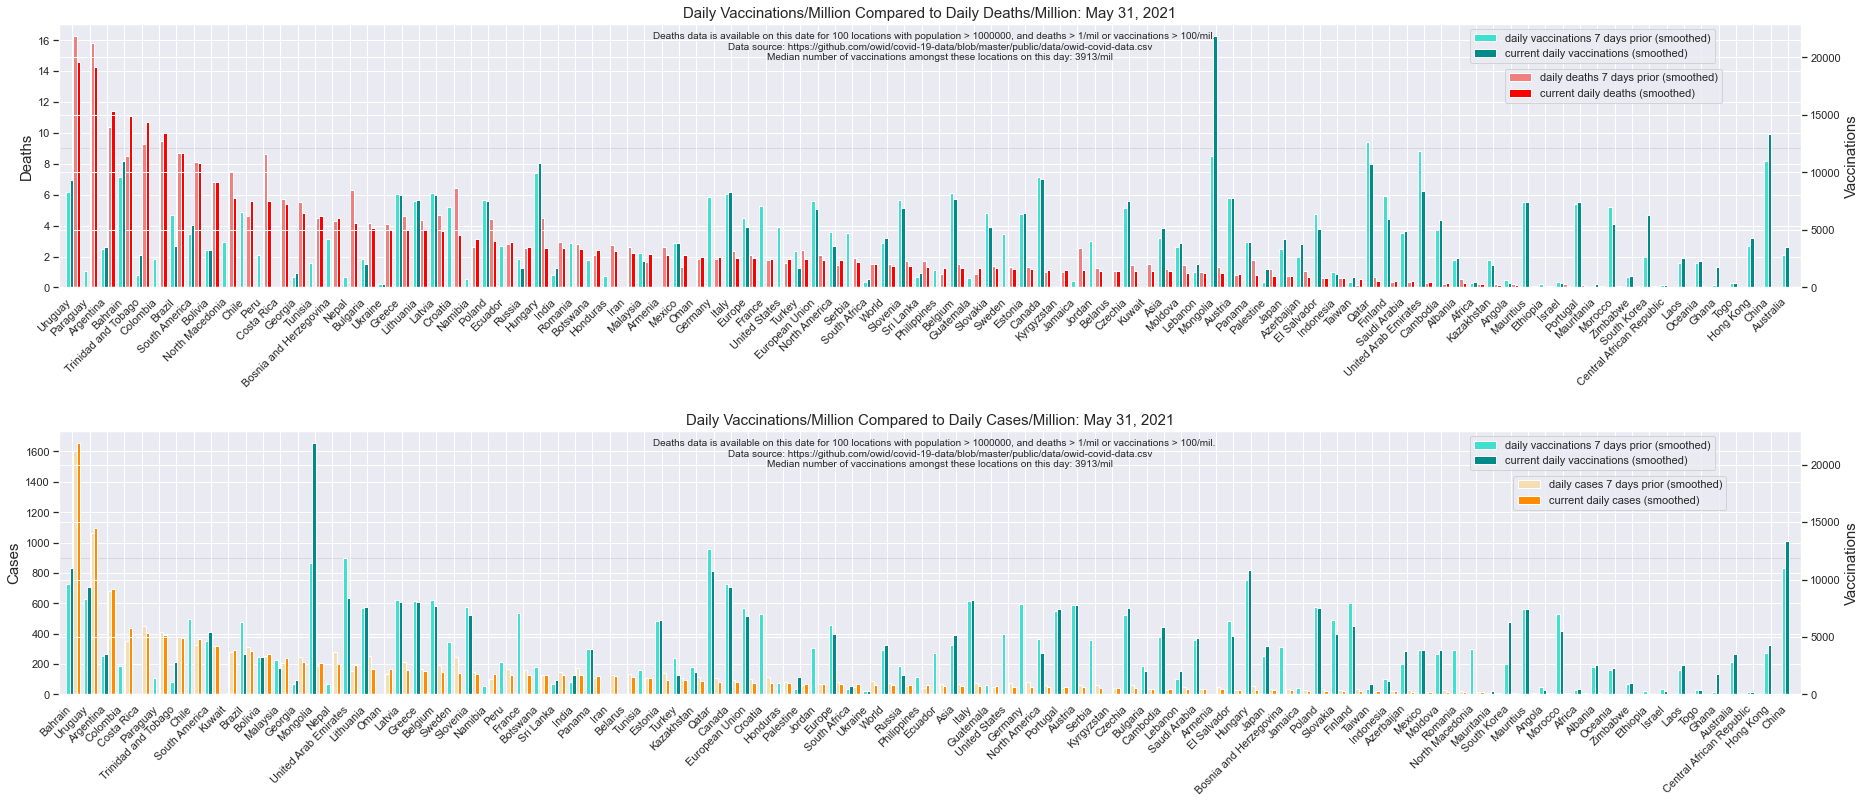

In [27]:
num_days_back = 7
legend_labels = []
x_vals = []
bar_width = 0.2
bar_transparency = 1
date_offset = 0
current_date = raw_df_dates[-1+date_offset]
past_date = raw_df_dates[-1*(num_days_back-date_offset)]
daily_deaths_threshold = 1 # include locations with more than this per million
daily_vax_threshold = 100

# Remove locations below daily deaths and vaccinations thresholds
perCapita_daily_filtered_df = perCapita_daily_df.query('new_deaths_smoothed_per_million > %d or new_vaccinations_smoothed_per_million > %d' %
                                                                 (daily_deaths_threshold, daily_vax_threshold))
# Temp datasets: extract current and past date rows for each location
temp_current_df = perCapita_daily_filtered_df.sort_values('date').groupby('location').apply(lambda x: x[x['date'] == current_date])
temp_past_df = perCapita_daily_filtered_df.sort_values('date').groupby('location').apply(lambda x: x[x['date'] == past_date])

# median daily vaccinations
median_daily_vaxs = temp_current_df['new_vaccinations_smoothed_per_million'].median().astype("int32")

# CREATE PLOTS
x_vals = np.arange(len(temp_current_df.index))
fig, axs = plt.subplots(2, 1, figsize=[int(len(x_vals)/4),10])
fig.tight_layout(h_pad=10)
inclusion_string = "Deaths data is available on this date for %d locations with population > %d, and deaths > %d/mil or vaccinations > %d/mil.\n\
    Data source: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv\n\
    Median number of vaccinations amongst these locations on this day: %d/mil" \
     % (len([i[0] for i in temp_current_df.index]), min_population, daily_deaths_threshold, daily_vax_threshold, median_daily_vaxs)

# death/vaccinations (top)
# sort temp datasets by "new_deaths_smoothed_per_million"
temp_current_df = temp_current_df.sort_values("new_deaths_smoothed_per_million", ascending=False)
temp_past_df = temp_past_df.reindex(temp_current_df.index)
# plot
ax_top1 = axs[0]
ax_top2 = ax_top1.twinx()
ax_top1.set_xlim([-0.5,len(x_vals)])
ax_top2.set_xlim([-0.5,len(x_vals)])
ax_top2.set_ylabel('Vaccinations', fontsize=15)
ax_top1.set_ylabel('Deaths', fontsize=15)
ax_top2.set_title("Daily Vaccinations/Million Compared to Daily Deaths/Million: %s" % current_date.strftime('%b %d, %Y'), fontsize=15)
ax_top1.set_xticks(x_vals + bar_width*1.3)
ax_top1.set_xticklabels([i[0] for i in temp_current_df.index], rotation = 45, ha='right')
ax_top1.bar(x_vals + bar_width*2, temp_past_df["new_deaths_smoothed_per_million"], alpha=bar_transparency, color='lightcoral', width=bar_width, zorder=1)
ax_top1.bar(x_vals + bar_width*3, temp_current_df["new_deaths_smoothed_per_million"], alpha=bar_transparency, color='red', width=bar_width, zorder=1)
ax_top1.hlines(ax_top1.get_yticks()[-1]/2, ax_top1.get_xlim()[0], ax_top1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
ax_top2.bar(x_vals, temp_past_df["new_vaccinations_smoothed_per_million"], color='turquoise', width=bar_width, zorder=1)
ax_top2.bar(x_vals + bar_width, temp_current_df["new_vaccinations_smoothed_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width, zorder=1)
ax_top2.legend(['daily vaccinations %d days prior (smoothed)'%num_days_back, 'current daily vaccinations (smoothed)'], loc=[0.81,0.85])
ax_top1.legend(['daily deaths %d days prior (smoothed)'%num_days_back, 'current daily deaths (smoothed)'], loc=[0.83, 0.7])
ax_top2.text(ax_top2.get_xlim()[1]/2, ax_top2.get_ylim()[1]*0.97, inclusion_string, va='top', ha='center', fontsize=10)

# cases/vaccinations (bottom)
# sort temp datasets by "new_cases_smoothed_per_million"
temp_current_df = temp_current_df.sort_values("new_cases_smoothed_per_million", ascending=False)
temp_past_df = temp_past_df.reindex(temp_current_df.index)
# plot
ax_bottom1 = axs[1]
ax_bottom2 = ax_bottom1.twinx()
ax_bottom2.set_ylabel('Vaccinations', fontsize=15)
ax_bottom1.set_ylabel('Cases', fontsize=15)
ax_bottom2.set_title("Daily Vaccinations/Million Compared to Daily Cases/Million: %s" % current_date.strftime('%b %d, %Y'), fontsize=15)
ax_bottom1.set_xticks(x_vals + bar_width*1.3)
ax_bottom1.set_xticklabels([i[0] for i in temp_current_df.index], rotation = 45, ha='right')
ax_bottom1.set_xlim([-0.5,len(x_vals)])
ax_bottom1.bar(x_vals + bar_width*2, temp_past_df["new_cases_smoothed_per_million"], alpha=bar_transparency, color='wheat', width=bar_width, zorder=1)
ax_bottom1.bar(x_vals + bar_width*3, temp_current_df["new_cases_smoothed_per_million"], alpha=bar_transparency, color='darkorange', width=bar_width, zorder=1)
ax_bottom1.hlines(ax_bottom1.get_yticks()[-1]/2, ax_bottom1.get_xlim()[0], ax_bottom1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
ax_bottom2.bar(x_vals, temp_past_df["new_vaccinations_smoothed_per_million"], color='turquoise', width=bar_width, zorder=1)
ax_bottom2.bar(x_vals + bar_width, temp_current_df["new_vaccinations_smoothed_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width, zorder=1)
ax_bottom2.legend(['daily vaccinations %d days prior (smoothed)'%num_days_back, 'current daily vaccinations (smoothed)'], loc=[0.81,0.85])
ax_bottom1.legend(['daily cases %d days prior (smoothed)'%num_days_back, 'current daily cases (smoothed)'], loc=[0.835, 0.7])
ax_bottom2.text(ax_bottom2.get_xlim()[1]/2, ax_bottom2.get_ylim()[1]*0.97, inclusion_string, va='top',  ha='center', fontsize=10)

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/daily_vaccine_vs_deaths_per_capita'
  plt.savefig(filename, bbox_inches = 'tight')

# CUMULATIVE DAILY DATA

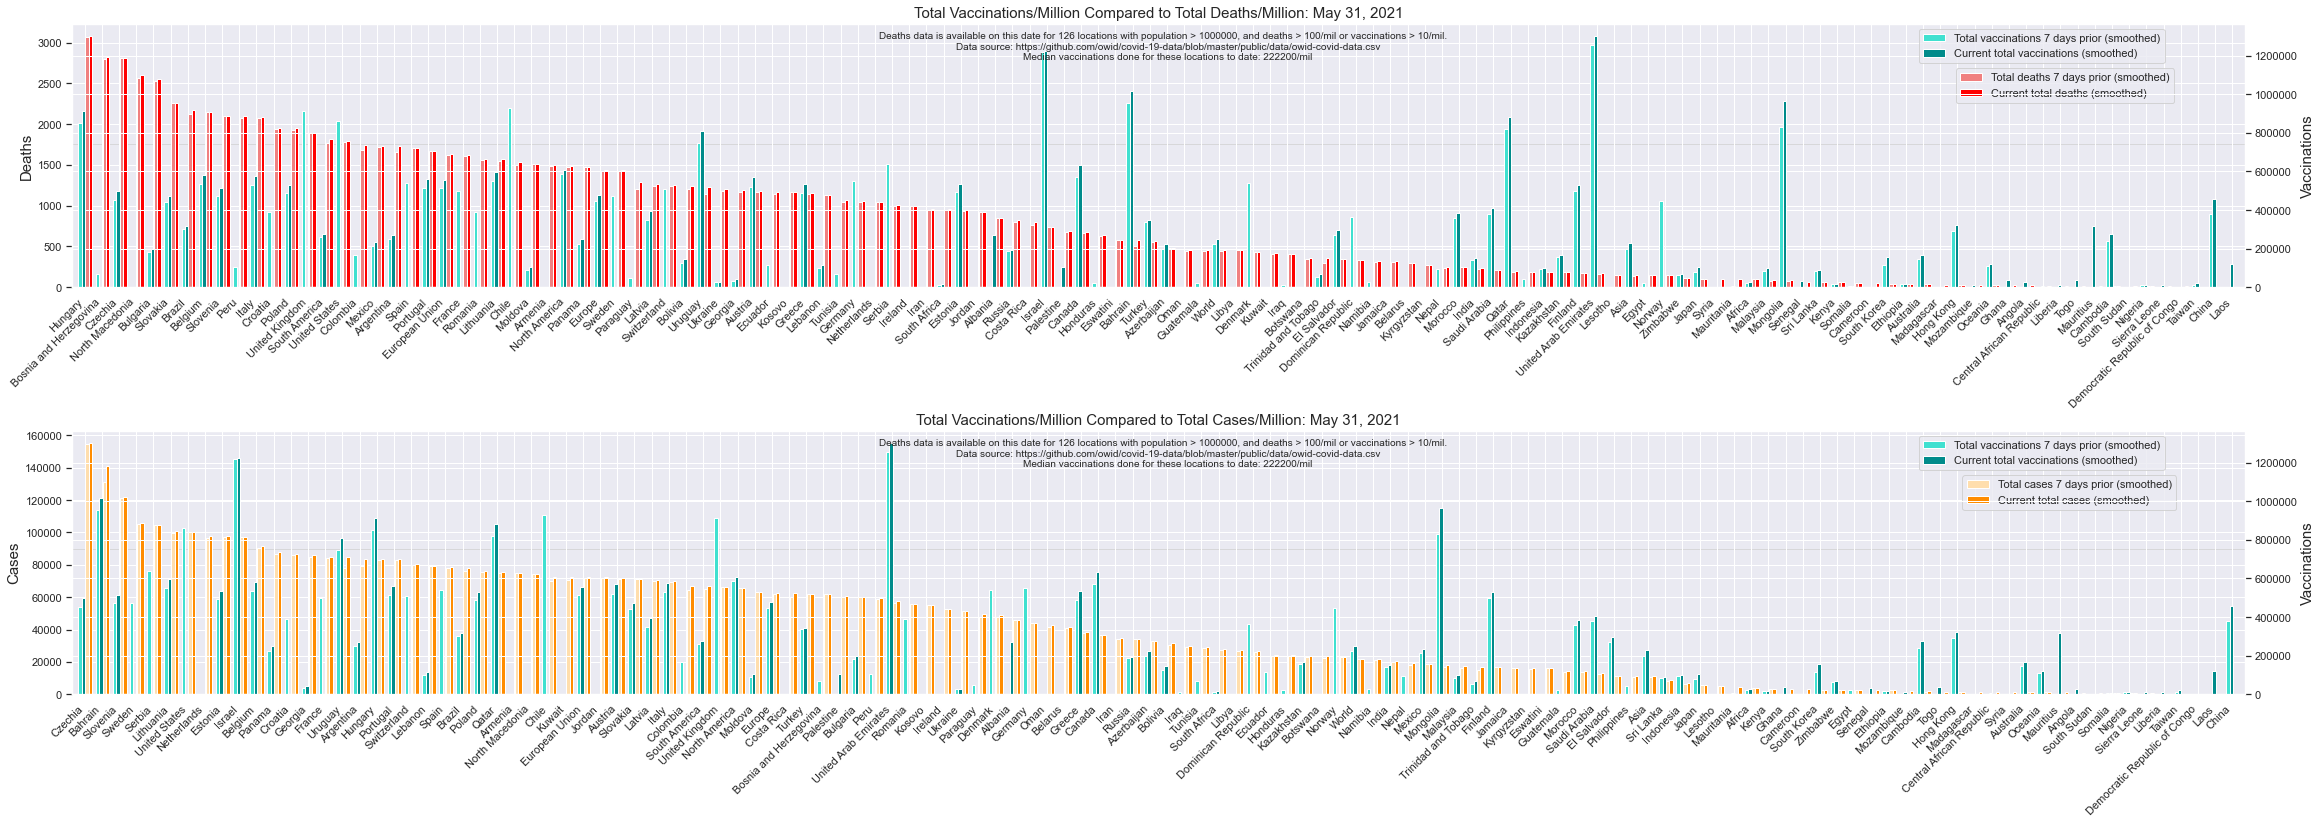

In [28]:
num_days_back = 7
legend_labels = []
x_vals = []
bar_width = 0.2
date_offset = 0
current_date = raw_df_dates[-1+date_offset]
past_date = raw_df_dates[-1*(num_days_back-date_offset)]
cumulative_deaths_threshold = 100 # include locations with more than this per million
cumulative_vax_threshold = 10

# Remove locations below daily deaths and vaccinations thresholds
perCapita_cumulative_filtered_df = perCapita_cumulative_df.query('total_deaths_per_million > %d or total_vaccinations_per_million > %d' %
                                                                 (cumulative_deaths_threshold, cumulative_vax_threshold))
# Temp datasets: extract current and past date rows for each location
temp_current_df = perCapita_cumulative_filtered_df.sort_values('date').groupby('location').apply(lambda x: x[x['date'] == current_date])
temp_past_df = perCapita_cumulative_filtered_df.sort_values('date').groupby('location').apply(lambda x: x[x['date'] == past_date])

# median total vaccinations
median_total_vaxs = temp_current_df['total_vaccinations_per_million'].median().astype('int32')

# CREATE PLOTS
x_vals = np.arange(len(temp_current_df.index))
fig, axs = plt.subplots(2, 1, figsize=[int(len(x_vals)/4),10])
axs[0].ticklabel_format(scilimits=[0, 10])
axs[1].ticklabel_format(scilimits=[0, 10])
fig.tight_layout(h_pad=10)
inclusion_string = "Deaths data is available on this date for %d locations with population > %d, and deaths > %d/mil or vaccinations > %d/mil.\n\
    Data source: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv\n\
    Median vaccinations done for these locations to date: %d/mil" \
     % (len([i[0] for i in temp_current_df.index]), min_population, cumulative_deaths_threshold, cumulative_vax_threshold, median_total_vaxs)

# death/vaccinations (top)
# sort temp datasets by deaths
temp_current_df = temp_current_df.sort_values("total_deaths_per_million", ascending=False)
temp_past_df = temp_past_df.reindex(temp_current_df.index)
# plot
ax_top1 = axs[0]
ax_top2 = ax_top1.twinx()
ax_top2.ticklabel_format(scilimits=[0, 10])
ax_top2.set_ylabel('Vaccinations', fontsize=15)
ax_top1.set_ylabel('Deaths', fontsize=15)
ax_top1.set_title("Total Vaccinations/Million Compared to Total Deaths/Million: %s" % current_date.strftime('%b %d, %Y'), fontsize=15)
ax_top1.set_xticks(x_vals + bar_width*1.3)
ax_top1.set_xlim([-0.5,len(x_vals)])
ax_top1.set_xticklabels([i[0] for i in temp_current_df.index], rotation = 45, ha='right')
ax_top1.bar(x_vals + bar_width*2, temp_past_df["total_deaths_per_million"], alpha=bar_transparency, color='lightcoral', width=bar_width, zorder=1)
ax_top1.bar(x_vals + bar_width*3, temp_current_df["total_deaths_per_million"], alpha=bar_transparency, color='red', width=bar_width, zorder=1)
ax_top1.hlines(ax_top1.get_yticks()[-1]/2, ax_top1.get_xlim()[0], ax_top1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
ax_top2.bar(x_vals, temp_past_df["total_vaccinations_per_million"], color='turquoise', width=bar_width, zorder=1)
ax_top2.bar(x_vals + bar_width, temp_current_df["total_vaccinations_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width, zorder=1)
ax_top2.legend(['Total vaccinations %d days prior (smoothed)'%num_days_back, 'Current total vaccinations (smoothed)'], loc=[0.85,0.85])
ax_top1.legend(['Total deaths %d days prior (smoothed)'%num_days_back, 'Current total deaths (smoothed)'], loc=[0.867, 0.7])
ax_top2.text(ax_top2.get_xlim()[1]/2, ax_top2.get_ylim()[1]*0.97, inclusion_string, ha='center', va='top', fontsize=10, zorder=2)

# cases/vaccinations (bottom)
# sort temp datasets by cases
temp_current_df = temp_current_df.sort_values("total_cases_per_million", ascending=False)
temp_past_df = temp_past_df.reindex(temp_current_df.index)
#plot
ax_bottom1 = axs[1]
ax_bottom2 = ax_bottom1.twinx()
ax_bottom2.ticklabel_format(scilimits=[0, 10])
ax_bottom2.set_ylabel('Vaccinations', fontsize=15)
ax_bottom1.set_ylabel('Cases', fontsize=15)
ax_bottom1.set_title("Total Vaccinations/Million Compared to Total Cases/Million: %s" % current_date.strftime('%b %d, %Y'), fontsize=15)
ax_bottom1.set_xticks(x_vals + bar_width*1.3)
ax_bottom1.set_xticklabels([i[0] for i in temp_current_df.index], rotation = 45, ha='right')
ax_bottom1.set_xlim([-0.5,len(x_vals)])
ax_bottom1.bar(x_vals + bar_width*2, temp_past_df["total_cases_per_million"], alpha=bar_transparency, color='navajowhite', width=bar_width)
ax_bottom1.bar(x_vals + bar_width*3, temp_current_df["total_cases_per_million"], alpha=bar_transparency, color='darkorange', width=bar_width)
ax_bottom1.hlines(ax_bottom1.get_yticks()[-1]/2, ax_bottom1.get_xlim()[0], ax_bottom1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
ax_bottom2.bar(x_vals, temp_past_df["total_vaccinations_per_million"], color='turquoise', width=bar_width)
ax_bottom2.bar(x_vals + bar_width, temp_current_df["total_vaccinations_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width)
ax_bottom2.legend(['Total vaccinations %d days prior (smoothed)'%num_days_back, 'Current total vaccinations (smoothed)'], loc=[0.85,0.85])
ax_bottom1.legend(['Total cases %d days prior (smoothed)'%num_days_back, 'Current total cases (smoothed)'], loc=[0.87, 0.7])
ax_bottom2.text(ax_top2.get_xlim()[1]/2, ax_top2.get_ylim()[1]*0.97, inclusion_string, ha='center', va='top', fontsize=10, zorder=2)

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/cumulative_vaccine_vs_deaths_per_capita'
  plt.savefig(filename, bbox_inches = 'tight')